# LetsGrowMore -VIP

## Author: Pranavi Shakkari

### Beginner Level - Task 2

#### Stock Market Prediction And Forecasting Using Stacked LSTM

##### 1.Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

##### 2.Reading the data

In [ ]:
np.random.seed(7)
data = pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")
print(data)

            Date    Open    High  ...   Close  Total Trade Quantity  Turnover (Lacs)
0     2018-09-28  234.05  235.95  ...  233.75               3069914          7162.35
1     2018-09-27  234.55  236.80  ...  233.25               5082859         11859.95
2     2018-09-26  240.00  240.00  ...  234.25               2240909          5248.60
3     2018-09-25  233.30  236.75  ...  236.10               2349368          5503.90
4     2018-09-24  233.55  239.20  ...  233.30               3423509          7999.55
...          ...     ...     ...  ...     ...                   ...              ...
2030  2010-07-27  117.60  119.50  ...  118.65                586100           694.98
2031  2010-07-26  120.10  121.00  ...  117.60                658440           780.01
2032  2010-07-23  121.80  121.95  ...  120.65                281312           340.31
2033  2010-07-22  120.30  122.00  ...  120.90                293312           355.17
2034  2010-07-21  122.10  123.00  ...  121.55                6586

##### 3.LSTM

In [ ]:
data["Date"]= pd.to_datetime(data["Date"])
data = data.sort_values(by = "Date")

close_data = data.reindex(columns=["Date", "Close"])
close_data.index = close_data.Date
close_data.drop('Date', axis=1, inplace=True)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
closed_scale_data = scaler.fit_transform(close_data.values)


# split into train and test sets
train_size = int(len(closed_scale_data) * 0.7)
test_size = len(closed_scale_data) - train_size
train, test = closed_scale_data[0:train_size,:], closed_scale_data[train_size:,:]
print(len(train), len(test))


1424 611


In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
 
look_back = 20
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1],1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(trainX.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)

Epoch 1/10
1403/1403 - 15s - loss: 7.1928e-04
Epoch 2/10
1403/1403 - 12s - loss: 2.9886e-04
Epoch 3/10
1403/1403 - 12s - loss: 2.1800e-04
Epoch 4/10
1403/1403 - 12s - loss: 2.0125e-04
Epoch 5/10
1403/1403 - 12s - loss: 1.9780e-04
Epoch 6/10
1403/1403 - 12s - loss: 1.7635e-04
Epoch 7/10
1403/1403 - 12s - loss: 1.8178e-04
Epoch 8/10
1403/1403 - 13s - loss: 1.7290e-04
Epoch 9/10
1403/1403 - 12s - loss: 1.6744e-04
Epoch 10/10
1403/1403 - 12s - loss: 1.6444e-04


In [ ]:
import math
from sklearn.metrics import mean_squared_error
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 8.62 RMSE


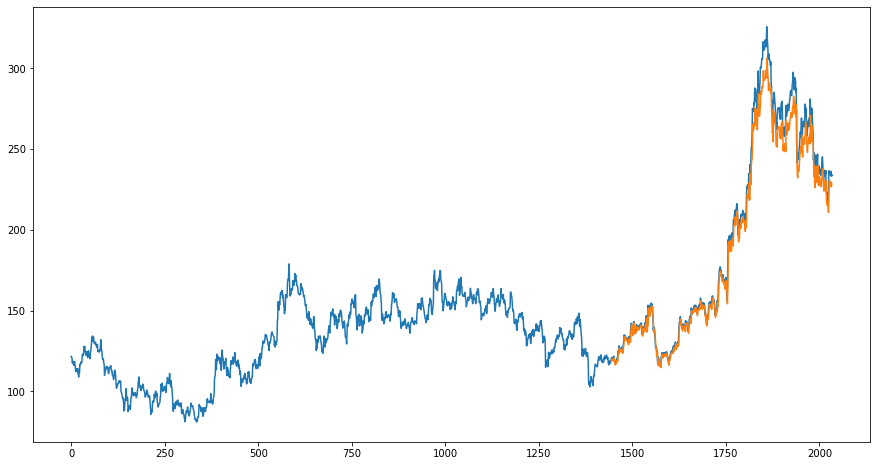

In [ ]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(closed_scale_data)
# shift test predictions for plotting
testPredictPlot = np.empty_like(closed_scale_data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(closed_scale_data)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(15,8))
plt.plot(scaler.inverse_transform(closed_scale_data))

plt.plot(testPredictPlot)
plt.show()